对于计算机而言，能够“看到”的是图像被编码之后的数字，但很难解高层语义概念，比如图像或者视频帧中出现目标的是人还是物体，更无法定位目标出现在图像中哪个区域。目标检测的主要目的是通过计算机自动识别图片或者视频帧中所有目标的类别，并在该目标周围绘制边界框，标示出每个目标的位置，如 **图1** 所示。
<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/e25116d994724f83abe3bef7f033c1c89bf34e083075494bb7833947c557f4fc" width = "700"  div align=center" width = "800"></center>
<center><br>图1：图像分类和目标检测示意图</br></center>
<br></br>
  
* 图1（a）是图像分类任务，只需识别出这是一张斑马的图片。 
* 图1（b）是目标检测任务，不仅要识别出这是一张斑马的图片，还要标出图中斑马的位置。

# 目标检测发展历程

在上一节中我们学习了图像分类处理基本流程，先使用卷积神经网络提取图像特征，然后再用这些特征预测分类概率，根据训练样本标签建立起分类损失函数，开启端到端的训练，如 **图2** 所示。
<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/d131c45973a244c590c3d1ee3866a694b134299542284b22b794e4ab76c4769d" width = "800"></center>
<center><br>图2：图像分类流程示意图</br></center>
<br></br>

但对于目标检测问题，按照 **图2** 的流程则行不通。因为在图像分类任务中，对整张图提取特征的过程中没能体现出不同目标之间的区别，最终也就没法分别标示出每个物体所在的位置。

为了解决这个问题，结合图片分类任务取得的成功经验，我们可以将目标检测任务进行拆分。假设我们现在有某种方式可以在输入图片上生成一系列可能包含物体的区域，这些区域称为候选区域，在一张图上可以生成很多个候选区域。然后对每个候选区域，可以把它单独当成一幅图像来看待，使用图像分类模型对它进行分类，看它属于哪个类别或者背景（即不包含任何物体的类别）。

上一节我们学过如何解决图像分类任务，使用卷积神经网络对一幅图像进行分类不再是一件困难的事情。那么，现在问题的关键就是如何产生候选区域？比如我们可以使用穷举法来产生候选区域，如图3所示。
<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/57755ac8e95a460f9262afc7c37a0db51f66027ff86c40e2967a2e22524c20a1" width = "800"></center>
<center><br>图3：候选区域</br></center>
<br></br>

A为图像上的某个像素点，B为A右下方另外一个像素点，A、B两点可以确定一个矩形框，记作AB。

* 如图3（a）所示：A在图片左上角位置，B遍历除A之外的所有位置，生成矩形框A1B1, …, A1Bn, …
* 如图3（b）所示：A在图片中间某个位置，B遍历A右下方所有位置，生成矩形框AkB1, …, AkBn, …

当A遍历图像上所有像素点，B则遍历它右下方所有的像素点，最终生成的矩形框集合{AiBj}将会包含图像上所有可以选择的区域。

只要我们对每个候选区域的分类足够的准确，则一定能找到跟实际物体足够接近的区域来。穷举法也许能得到正确的预测结果，但其计算量也是非常巨大的，其所生成的总的候选区域数目约为$\frac{W^2 H^2}{4}$，假设$H=W=100$，总数将会达到$2.5 \times 10^{7}$个，如此多的候选区域使得这种方法几乎没有什么实用性。但是通过这种方式，我们可以看出，假设分类任务完成的足够完美，从理论上来讲检测任务也是可以解决的，亟待解决的问题是如何设计出合适的方法来产生候选区域。

科学家们开始思考，是否可以应用传统图像算法先产生候选区域，然后再用卷积神经网络对这些区域进行分类？

* 2013年，[Ross Girshick](https://arxiv.org/abs/1311.2524) 等人于首次将CNN的方法应用在目标检测任务上，他们使用传统图像算法[selective search](https://link.springer.com/article/10.1007/s11263-013-0620-5)产生候选区域，取得了极大的成功，这就是对目标检测领域影响深远的区域卷积神经网络(R-CNN)模型。
* 2015年，[Ross Girshick](https://arxiv.org/abs/1504.08083)对此方法进行了改进，提出了Fast RCNN模型。通过将不同区域的物体共用卷积层的计算，大大缩减了计算量，提高了处理速度，而且还引入了调整目标物体位置的回归方法，进一步提高了位置预测的准确性。
* 2015年，[Shaoqing Ren](https://arxiv.org/abs/1506.01497)等人提出了Faster RCNN模型，提出了RPN的方法来产生物体的候选区域，这一方法里面不再需要使用传统的图像处理算法来产生候选区域，进一步提升了处理速度。
* 2017年，[Kaiming He](https://arxiv.org/abs/1703.06870)等人于提出了Mask RCNN模型，只需要在Faster RCNN模型上添加比较少的计算量，就可以同时实现目标检测和物体实例分割两个任务。

以上都是基于R-CNN系列的著名模型，对目标检测方向的发展有着较大的影响力。此外，还有一些其他模型，比如[SSD](https://arxiv.org/abs/1512.02325)、YOLO([1](https://arxiv.org/abs/1506.02640v5), [2](https://arxiv.org/abs/1612.08242), [3](https://arxiv.org/abs/1804.02767))、[R-FCN](https://arxiv.org/abs/1605.06409)等也都是目标检测领域流行的模型结构。

R-CNN的系列算法分成两个阶段，先在图像上产生候选区域，再对候选区域进行分类并预测目标物体位置，它们通常被叫做两阶段检测算法。SSD和YOLO算法则只使用一个网络同时产生候选区域并预测出物体的类别和位置，所以它们通常被叫做单阶段检测算法。由于篇幅所限，本章将重点介绍YOLO-V3算法，并用其完成林业病虫害数据集中的昆虫检测任务，主要涵盖如下内容：

* 图像检测基础概念：介绍与目标检测任相关的基本概念，包括边界框、锚框和交并比等。
* 林业病虫害数据集：介绍数据集结构及数据预处理方法。
* YOLO-V3目标检测模型：介绍算法原理，及如何应用林业病虫害数据集进行模型训练和测试。


## 目标检测基础概念

在介绍目标检测算法之前，先介绍一些跟检测相关的基本概念，包括边界框、锚框和交并比等。

### 边界框（bounding box）

检测任务需要同时预测物体的类别和位置，因此需要引入一些跟位置相关的概念。通常使用边界框（bounding box，bbox）来表示物体的位置，边界框是正好能包含住物体的矩形框，如 **图4** 所示，图中3个人分别对应3个边界框。
<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/f581e1bfd07a414596368c9c03a1b30ea115a2e30a014be68b2c26961f5c38fa" width = "400"  div align=center"></center>
<center><br>图4：边界框</br></center>
<br></br>

通常有两种格式来表示边界框的位置：

1. xyxy，即$(x_1, y_1, x_2, y_2)$，其中$(x_1, y_1)$是矩形框左上角的坐标，$(x_2, y_2)$是矩形框右下角的坐标。图4中3个红色矩形框用xyxy格式表示如下：
  
* 左：$(40.93, 141.1, 226.99, 515.73)$。
* 中：$(214.29, 325.03, 399.82, 631.37)$。
* 右：$(247.2, 131.62, 480.0, 639.32)$。
  
2. xywh，即$(x, y, w, h)$，其中$(x, y)$是矩形框中心点的坐标，w是矩形框的宽度，h是矩形框的高度。

在检测任务中，训练数据集的标签里会给出目标物体真实边界框所对应的$(x_1, y_1, x_2, y_2)$，这样的边界框也被称为真实框（ground truth box），如 **图4** 所示，图中画出了3个人像所对应的真实框。模型会对目标物体可能出现的位置进行预测，由模型预测出的边界框则称为预测框（prediction box）。
  
------

**注意：**

1. 在阅读代码时，请注意使用的是哪一种格式的表示方式。
1. 图片坐标的原点在左上角，x轴向右为正方向，y轴向下为正方向。

------

要完成一项检测任务，我们通常希望模型能够根据输入的图片，输出一些预测的边界框，以及边界框中所包含的物体的类别或者说属于某个类别的概率，例如这种格式: $[L, P, x_1, y_1, x_2, y_2]$，其中L是类别标签，P是物体属于该类别的概率。一张输入图片可能会产生多个预测框，接下来让我们一起学习如何完成这样一项任务。

### 锚框（Anchor）

锚框与物体边界框不同，是由人们假想出来的一种框。先设定好锚框的大小和形状，再以图像上某一个点为中心画出矩形框。在下图中，以像素点[300, 500]为中心可以使用下面的程序生成3个框，如图中蓝色框所示，其中锚框A1跟人像区域非常接近。

(300.0, 500.0, 282.84271247461896, 141.4213562373095)
(300.0, 500.0, 200.0, 200.0)
(300.0, 500.0, 141.42135623730948, 282.842712474619)


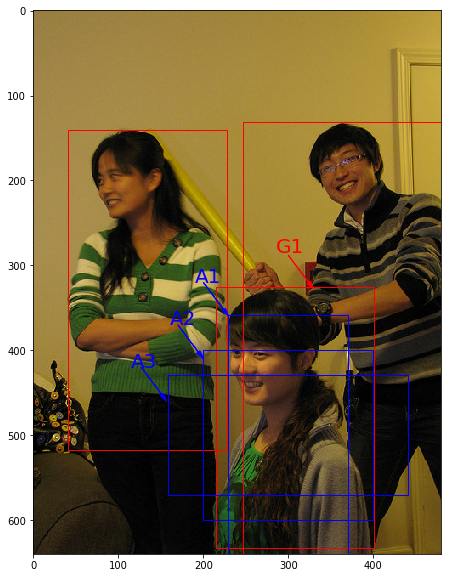

In [58]:
# 画图展示如何绘制边界框和锚框
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.image import imread
import math

# 定义画矩形框的程序    
def draw_rectangle(currentAxis, bbox, edgecolor = 'k', facecolor = 'y', fill=False, linestyle='-'):
    # currentAxis，坐标轴，通过plt.gca()获取
    # bbox，边界框，包含四个数值的list， [x1, y1, x2, y2]
    # edgecolor，边框线条颜色
    # facecolor，填充颜色
    # fill, 是否填充
    # linestype，边框线型
    # patches.Rectangle需要传入左上角坐标、矩形区域的宽度、高度等参数
    rect=patches.Rectangle((bbox[0], bbox[1]), bbox[2]-bbox[0]+1, bbox[3]-bbox[1]+1, linewidth=1,
                           edgecolor=edgecolor,facecolor=facecolor,fill=fill, linestyle=linestyle)
    currentAxis.add_patch(rect)

    
plt.figure(figsize=(10, 10))

filename = './work/images/section3/000000086956.jpg'
im = imread(filename)
plt.imshow(im)

# 使用xyxy格式表示物体真实框
bbox1 = [214.29, 325.03, 399.82, 631.37]
bbox2 = [40.93, 141.1, 226.99, 515.73]
bbox3 = [247.2, 131.62, 480.0, 639.32]

currentAxis=plt.gca()

draw_rectangle(currentAxis, bbox1, edgecolor='r')
draw_rectangle(currentAxis, bbox2, edgecolor='r')
draw_rectangle(currentAxis, bbox3,edgecolor='r')

# 绘制锚框
def draw_anchor_box(center, length, scales, ratios, img_height, img_width):
    """
    以center为中心，产生一系列锚框
    其中length指定了一个基准的长度
    scales是包含多种尺寸比例的list
    ratios是包含多种长宽比的list
    img_height和img_width是图片的尺寸，生成的锚框范围不能超出图片尺寸之外
    """
    bboxes = []
    for scale in scales:
        for ratio in ratios:
            h = length*scale*math.sqrt(ratio)
            w = length*scale/math.sqrt(ratio) 
            x1 = max(center[0] - w/2., 0.)
            y1 = max(center[1] - h/2., 0.)
            x2 = min(center[0] + w/2. - 1.0, img_width - 1.0)
            y2 = min(center[1] + h/2. - 1.0, img_height - 1.0)
            print(center[0], center[1], w, h)
            bboxes.append([x1, y1, x2, y2])

    for bbox in bboxes:
        draw_rectangle(currentAxis, bbox, edgecolor = 'b')

img_height = im.shape[0]
img_width = im.shape[1]        
draw_anchor_box([300., 500.], 100., [2.0], [0.5, 1.0, 2.0], img_height, img_width)


################# 以下为添加文字说明和箭头###############################

plt.text(285, 285, 'G1', color='red', fontsize=20)
plt.arrow(300, 288, 30, 40, color='red', width=0.001, length_includes_head=True, \
         head_width=5, head_length=10, shape='full')

plt.text(190, 320, 'A1', color='blue', fontsize=20)
plt.arrow(200, 320, 30, 40, color='blue', width=0.001, length_includes_head=True, \
         head_width=5, head_length=10, shape='full')

plt.text(160, 370, 'A2', color='blue', fontsize=20)
plt.arrow(170, 370, 30, 40, color='blue', width=0.001, length_includes_head=True, \
         head_width=5, head_length=10, shape='full')

plt.text(115, 420, 'A3', color='blue', fontsize=20)
plt.arrow(127, 420, 30, 40, color='blue', width=0.001, length_includes_head=True, \
         head_width=5, head_length=10, shape='full')

#draw_anchor_box([200., 200.], 100., [2.0], [0.5, 1.0, 2.0])    
plt.show()



在目标检测模型中，通常会以某种规则在图片上生成一系列锚框，将这些锚框当成可能的候选区域。模型对这些候选区域是否包含物体进行预测，如果包含目标物体，则还需要进一步预测出物体所属的类别。还有更为重要的一点是，由于锚框位置是固定的，它不大可能刚好跟物体边界框重合，所以需要在锚框的基础上进行微调以形成能准确描述物体位置的预测框，模型需要预测出微调的幅度。在训练过程中，模型通过学习不断的调整参数，最终能学会如何判别出锚框所代表的候选区域是否包含物体，如果包含物体的话，物体属于哪个类别，以及物体边界框相对于锚框位置需要调整的幅度。

不同的模型往往有着不同的生成锚框的方式，在后面的内容中，会详细介绍YOLO-V3算法里面产生锚框的规则，理解了它的设计方案，也很容易类推到其它模型上。

### 交并比（Intersection Over Union, IOU）

上面我们画出了以点$(300, 500)$为中心，生成的三个锚框，我们可以看到锚框A1 与真实框 G1的重合度比较好。那么如何衡量这三个锚框跟真实框之间的关系呢，在检测任务中是使用交并比（Intersection of Union，IoU）作为衡量指标。这一概念来源于数学中的集合，用来描述两个集合$A$和$B$之间的关系，它等于两个集合的交集里面所包含的元素个数，除以它们的并集里面所包含的元素个数，具体计算公式如下：

$$IoU = \frac{A\cap B}{A \cup B}$$

我们将用这个概念来描述两个框之间的重合度。两个框可以看成是两个像素的集合，它们的交并比等于两个框重合部分的面积除以它们合并起来的面积。下图a中红色区域是两个框的重合面积，图b中蓝色区域是两个框的相并面积。用这两个面积相除即可得到它们之间的交并比，如 **图5** 所示。

<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/1eaa96c6dd8149f59665d80384ba189eb9f4c9bcc5ef47a79027385cbac033a0" width = "300"></center>
<center><br>图5：交并比</br></center>
<br></br>


假设两个矩形框A和B的位置分别为：
$$A:  [x_{a1}, y_{a1}, x_{a2}, y_{a2}]$$

$$B:  [x_{b1}, y_{b1}, x_{b2}, y_{b2}]$$

假如位置关系如 **图6** 所示：
<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/50bbb215ee9d4c048fd8788e2828ec7694199c6eadf746dfb9a7b83c79c17a45" width = "300"></center>
<center><br>图6：计算交并比</br></center>
<br></br>

如果二者有相交部分，则相交部分左上角坐标为：
$$x_1 = max(x_{a1}, x_{b1}), \ \ \ \ \ y_1 = max(y_{a1}, y_{b1})$$

相交部分右下角坐标为：
$$x_2 = min(x_{a2}, x_{b2}), \ \ \ \ \ y_2 = min(y_{a2}, y_{b2})$$

计算先交部分面积：
$$intersection = max(x_2 - x_1 + 1.0, 0) \cdot max(y_2 - y_1 + 1.0, 0)$$

矩形框A和B的面积分别是：
$$S_A = (x_{a2} - x_{a1} + 1.0) \cdot (y_{a2} - y_{a1} + 1.0)$$

$$S_B = (x_{b2} - x_{b1} + 1.0) \cdot (y_{b2} - y_{b1} + 1.0)$$

计算相并部分面积：
$$union = S_A + S_B - intersection$$

计算交并比：

$$IoU = \frac{intersection}{union}$$

------
**思考：**

两个矩形框之间的相对位置关系，除了上面的示意图之外，还有哪些可能，上面的公式能否覆盖所有的情形？

------

计算程序如下：

In [7]:
# 计算IoU，矩形框的坐标形式为xyxy，这个函数会被保存在box_utils.py文件中
def box_iou_xyxy(box1, box2):
    # 获取box1左上角和右下角的坐标
    x1min, y1min, x1max, y1max = box1[0], box1[1], box1[2], box1[3]
    # 计算box1的面积
    s1 = (y1max - y1min + 1.) * (x1max - x1min + 1.)
    # 获取box2左上角和右下角的坐标
    x2min, y2min, x2max, y2max = box2[0], box2[1], box2[2], box2[3]
    # 计算box2的面积
    s2 = (y2max - y2min + 1.) * (x2max - x2min + 1.)
    
    # 计算相交矩形框的坐标
    xmin = np.maximum(x1min, x2min)
    ymin = np.maximum(y1min, y2min)
    xmax = np.minimum(x1max, x2max)
    ymax = np.minimum(y1max, y2max)
    # 计算相交矩形行的高度、宽度、面积
    inter_h = np.maximum(ymax - ymin + 1., 0.)
    inter_w = np.maximum(xmax - xmin + 1., 0.)
    intersection = inter_h * inter_w
    # 计算相并面积
    union = s1 + s2 - intersection
    # 计算交并比
    iou = intersection / union
    return iou


bbox1 = [100., 100., 200., 200.]
bbox2 = [120., 120., 220., 220.]
iou = box_iou_xyxy(bbox1, bbox2)
print('IoU is {}'.format(iou))  

IoU is 0.474026443176


In [8]:
# 计算IoU，矩形框的坐标形式为xywh
def box_iou_xywh(box1, box2):
    x1min, y1min = box1[0] - box1[2]/2.0, box1[1] - box1[3]/2.0
    x1max, y1max = box1[0] + box1[2]/2.0, box1[1] + box1[3]/2.0
    s1 = box1[2] * box1[3]

    x2min, y2min = box2[0] - box2[2]/2.0, box2[1] - box2[3]/2.0
    x2max, y2max = box2[0] + box2[2]/2.0, box2[1] + box2[3]/2.0
    s2 = box2[2] * box2[3]

    xmin = np.maximum(x1min, x2min)
    ymin = np.maximum(y1min, y2min)
    xmax = np.minimum(x1max, x2max)
    ymax = np.minimum(y1max, y2max)
    inter_h = np.maximum(ymax - ymin, 0.)
    inter_w = np.maximum(xmax - xmin, 0.)
    intersection = inter_h * inter_w

    union = s1 + s2 - intersection
    iou = intersection / union
    return iou

为了直观的展示交并比的大小跟重合程度之间的关系，**图7** 示意了不同交并比下两个框之间的相对位置关系，从 IoU = 0.95 到 IoU = 0.
<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/4befa4f120ca48a1a41986bf5542abb8ec136a1545214264bbf78e315cfb03f9" width = "500"></center>
<center><br>图7：不同交并比大小示意图</br></center>
<br></br>

------
**问题：**

1. 什么情况下两个矩形框的IoU等于1？
1. 什么情况下两个矩形框的IoU等于0？

------

# 林业病虫害数据集和数据预处理方法介绍

在本次的课程中，将使用百度与林业大学合作开发的林业病虫害防治项目中用到昆虫数据集，关于该项目和数据集的更多信息，可以参考[相关报道](补充报道文章链接)。在这一小节中将为读者介绍该数据集，以及计算机视觉任务中常用的数据预处理方法。
   
## 读取AI识虫数据集标注信息

AI识虫数据集结构如下：

* 提供了2183张图片，其中训练集1693张，验证集245，测试集245张。
* 包含7种昆虫，分别是Boerner、Leconte、Linnaeus、acuminatus、armandi、coleoptera和linnaeus。
* 包含了图片和标注，请读者先将数据解压，并存放在insects目录下。

In [9]:
# 解压数据脚本，第一次运行时打开注释，将文件解压到work目录下
# !unzip -d /home/aistudio/work /home/aistudio/data/data19638/insects.zip

将数据解压之后，可以看到insects目录下的结构如下所示。

        insects
            |---train
            |         |---annotations
            |         |         |---xmls
            |         |                  |---100.xml
            |         |                  |---101.xml
            |         |                  |---...
            |         |
            |         |---images
            |                   |---100.jpeg
            |                   |---101.jpeg
            |                   |---...
            |
            |---val
            |        |---annotations
            |        |         |---xmls
            |        |                  |---1221.xml
            |        |                  |---1277.xml
            |        |                  |---...
            |        |
            |        |---images
            |                  |---1221.jpeg
            |                  |---1277.jpeg
            |                  |---...
            |
            |---test
                     |---images
                               |---1833.jpeg
                               |---1838.jpeg
                               |---...

insects目录下面，一共包含train、val和test三个文件夹。在train目录下，annotations/xmls目录下存放着图片的标注，每个xml文件是对一张图片的说明，包括了图片的尺寸、包含的昆虫的名称、在图片上出现的位置等信息。

In [1]:
<annotation>
        <folder>刘霏霏</folder>
        <filename>100.jpeg</filename>
        <path>/home/fion/桌面/刘霏霏/100.jpeg</path>
        <source>
                <database>Unknown</database>
        </source>
        <size>
                <width>1336</width>
                <height>1336</height>
                <depth>3</depth>
        </size>
        <segmented>0</segmented>
        <object>
                <name>Boerner</name>
                <pose>Unspecified</pose>
                <truncated>0</truncated>
                <difficult>0</difficult>
                <bndbox>
                        <xmin>500</xmin>
                        <ymin>893</ymin>
                        <xmax>656</xmax>
                        <ymax>966</ymax>
                </bndbox>
        </object>
        <object>
                <name>Leconte</name>
                <pose>Unspecified</pose>
                <truncated>0</truncated>
                <difficult>0</difficult>
                <bndbox>
                        <xmin>622</xmin>
                        <ymin>490</ymin>
                        <xmax>756</xmax>
                        <ymax>610</ymax>
                </bndbox>
        </object>
        <object>
                <name>armandi</name>
                <pose>Unspecified</pose>
                <truncated>0</truncated>
                <difficult>0</difficult>
                <bndbox>
                        <xmin>432</xmin>
                        <ymin>663</ymin>
                        <xmax>517</xmax>
                        <ymax>729</ymax>
                </bndbox>
        </object>
        <object>
                <name>coleoptera</name>
                <pose>Unspecified</pose>
                <truncated>0</truncated>
                <difficult>0</difficult>
                <bndbox>
                        <xmin>624</xmin>
                        <ymin>685</ymin>
                        <xmax>697</xmax>
                        <ymax>771</ymax>
                </bndbox>
        </object>
        <object>
                <name>linnaeus</name>
                <pose>Unspecified</pose>
                <truncated>0</truncated>
                <difficult>0</difficult>
                <bndbox>
                        <xmin>783</xmin>
                        <ymin>700</ymin>
                        <xmax>856</xmax>
                        <ymax>802</ymax>
                </bndbox>
        </object>
</annotation>

上面列出的xml文件中的主要参数说明如下：

-size：图片尺寸

-object：图片中包含的物体，一张图片可能中包含多个物体

* name：昆虫名称
* bndbox：物体真实框
* difficult：识别是否困难


下面我们将从数据集中读取xml文件，将每张图片的标注信息读取出来。在读取具体的标注文件之前，我们先完成一件事情，就是将昆虫的类别名字（字符串）转化成数字表示的类别。因为神经网络里面计算时需要的输入类型是数值型的，所以需要将字符串表示的类别转化成具体的数字。昆虫类别名称的列表是：['Boerner', 'Leconte', 'Linnaeus', 'acuminatus', 'armandi', 'coleoptera', 'linnaeus']，这里我们约定此列表中：'Boerner'对应类别0，'Leconte'对应类别1，...，'linnaeus'对应类别6。使用下面的程序可以得到表示名称字符串和数字类别之间映射关系的字典。

In [10]:
INSECT_NAMES = ['Boerner', 'Leconte', 'Linnaeus', 
                'acuminatus', 'armandi', 'coleoptera', 'linnaeus']

def get_insect_names():
    """
    return a dict, as following,
        {'Boerner': 0,
         'Leconte': 1,
         'Linnaeus': 2, 
         'acuminatus': 3,
         'armandi': 4,
         'coleoptera': 5,
         'linnaeus': 6
        }
    It can map the insect name into an integer label.
    """
    insect_category2id = {}
    for i, item in enumerate(INSECT_NAMES):
        insect_category2id[item] = i

    return insect_category2id

In [11]:
cname2cid = get_insect_names()
cname2cid

{'Boerner': 0,
 'Leconte': 1,
 'Linnaeus': 2,
 'acuminatus': 3,
 'armandi': 4,
 'coleoptera': 5,
 'linnaeus': 6}

调用get_insect_names函数返回一个dict，其键-值对描述了昆虫名称-数字类别之间的映射关系。

下面的程序从annotations/xml目录下面读取所有文件标注信息。

In [12]:
import os
import numpy as np
import xml.etree.ElementTree as ET

def get_annotations(cname2cid, datadir):
    filenames = os.listdir(os.path.join(datadir, 'annotations', 'xmls'))
    records = []
    ct = 0
    for fname in filenames:
        fid = fname.split('.')[0]
        fpath = os.path.join(datadir, 'annotations', 'xmls', fname)
        img_file = os.path.join(datadir, 'images', fid + '.jpeg')
        tree = ET.parse(fpath)

        if tree.find('id') is None:
            im_id = np.array([ct])
        else:
            im_id = np.array([int(tree.find('id').text)])

        objs = tree.findall('object')
        im_w = float(tree.find('size').find('width').text)
        im_h = float(tree.find('size').find('height').text)
        gt_bbox = np.zeros((len(objs), 4), dtype=np.float32)
        gt_class = np.zeros((len(objs), ), dtype=np.int32)
        is_crowd = np.zeros((len(objs), ), dtype=np.int32)
        difficult = np.zeros((len(objs), ), dtype=np.int32)
        for i, obj in enumerate(objs):
            cname = obj.find('name').text
            gt_class[i] = cname2cid[cname]
            _difficult = int(obj.find('difficult').text)
            x1 = float(obj.find('bndbox').find('xmin').text)
            y1 = float(obj.find('bndbox').find('ymin').text)
            x2 = float(obj.find('bndbox').find('xmax').text)
            y2 = float(obj.find('bndbox').find('ymax').text)
            x1 = max(0, x1)
            y1 = max(0, y1)
            x2 = min(im_w - 1, x2)
            y2 = min(im_h - 1, y2)
            # 这里使用xywh格式来表示目标物体真实框
            gt_bbox[i] = [(x1+x2)/2.0 , (y1+y2)/2.0, x2-x1+1., y2-y1+1.]
            is_crowd[i] = 0
            difficult[i] = _difficult

        voc_rec = {
            'im_file': img_file,
            'im_id': im_id,
            'h': im_h,
            'w': im_w,
            'is_crowd': is_crowd,
            'gt_class': gt_class,
            'gt_bbox': gt_bbox,
            'gt_poly': [],
            'difficult': difficult
            }
        if len(objs) != 0:
            records.append(voc_rec)
        ct += 1
    return records

In [14]:
TRAINDIR = '/home/aistudio/work/insects/train'
TESTDIR = '/home/aistudio/work/insects/test'
VALIDDIR = '/home/aistudio/work/insects/val'
cname2cid = get_insect_names()
records = get_annotations(cname2cid, TRAINDIR)

In [15]:
len(records)

1693

In [16]:
records[0]

{'difficult': array([0, 0, 0, 0, 0, 0, 0], dtype=int32),
 'gt_bbox': array([[411.5, 583. , 142. , 199. ],
        [654.5, 418.5, 128. , 132. ],
        [678.5, 736.5,  70. ,  90. ],
        [758. , 647.5,  53. ,  76. ],
        [843. , 538.5,  69. ,  96. ],
        [559.5, 788. ,  68. ,  83. ],
        [831.5, 754.5,  56. ,  56. ]], dtype=float32),
 'gt_class': array([1, 0, 2, 3, 4, 5, 5], dtype=int32),
 'gt_poly': [],
 'h': 1268.0,
 'im_file': '/home/aistudio/work/insects/train/images/1915.jpeg',
 'im_id': array([0]),
 'is_crowd': array([0, 0, 0, 0, 0, 0, 0], dtype=int32),
 'w': 1268.0}

通过上面的程序，将所有训练数据集的标注数据全部读取出来了，存放在records列表下面，其中每一个元素是一张图片的标注数据，包含了图片存放地址，图片id，图片高度和宽度，图片中所包含的目标物体的种类和位置。

## 数据读取和预处理

数据预处理是训练神经网络时非常重要的步骤。合适的预处理方法，可以帮助模型更好的收敛并防止过拟合。首先我们需要从磁盘读入数据，然后需要对这些数据进行预处理，为了保证网络运行的速度通常还要对数据预处理进行加速。

### 数据读取

前面已经将图片的所有描述信息保存在records中了，其中的每一个元素包含了一张图片的描述，下面的程序展示了如何根据records里面的描述读取图片及标注。

In [17]:
### 数据读取
import cv2

def get_bbox(gt_bbox, gt_class):
    # 对于一般的检测任务来说，一张图片上往往会有多个目标物体
    # 设置参数MAX_NUM = 50， 即一张图片最多取50个真实框；如果真实
    # 框的数目少于50个，则将不足部分的gt_bbox, gt_class和gt_score的各项数值全设置为0
    MAX_NUM = 50
    gt_bbox2 = np.zeros((MAX_NUM, 4))
    gt_class2 = np.zeros((MAX_NUM,))
    for i in range(len(gt_bbox)):
        gt_bbox2[i, :] = gt_bbox[i, :]
        gt_class2[i] = gt_class[i]
        if i >= MAX_NUM:
            break
    return gt_bbox2, gt_class2

def get_img_data_from_file(record):
    """
    record is a dict as following,
      record = {
            'im_file': img_file,
            'im_id': im_id,
            'h': im_h,
            'w': im_w,
            'is_crowd': is_crowd,
            'gt_class': gt_class,
            'gt_bbox': gt_bbox,
            'gt_poly': [],
            'difficult': difficult
            }
    """
    im_file = record['im_file']
    h = record['h']
    w = record['w']
    is_crowd = record['is_crowd']
    gt_class = record['gt_class']
    gt_bbox = record['gt_bbox']
    difficult = record['difficult']

    img = cv2.imread(im_file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # check if h and w in record equals that read from img
    assert img.shape[0] == int(h), \
             "image height of {} inconsistent in record({}) and img file({})".format(
               im_file, h, img.shape[0])

    assert img.shape[1] == int(w), \
             "image width of {} inconsistent in record({}) and img file({})".format(
               im_file, w, img.shape[1])

    gt_boxes, gt_labels = get_bbox(gt_bbox, gt_class)

    # gt_bbox 用相对值
    gt_boxes[:, 0] = gt_boxes[:, 0] / float(w)
    gt_boxes[:, 1] = gt_boxes[:, 1] / float(h)
    gt_boxes[:, 2] = gt_boxes[:, 2] / float(w)
    gt_boxes[:, 3] = gt_boxes[:, 3] / float(h)
  
    return img, gt_boxes, gt_labels, (h, w)

In [18]:
record = records[0]
img, gt_boxes, gt_labels, scales = get_img_data_from_file(record)

In [19]:
img.shape

(1268, 1268, 3)

In [20]:
gt_boxes.shape

(50, 4)

In [21]:
gt_labels

array([1., 0., 2., 3., 4., 5., 5., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [22]:
scales

(1268.0, 1268.0)

get_img_data_from_file()函数可以返回图片数据的数据，它们是图像数据img, 真实框坐标gt_boxes, 真实框包含的物体类别gt_labels, 图像尺寸scales。

### 数据预处理

在计算机视觉中，通常会对图像做一些随机的变化，产生相似但又不完全相同的样本。主要作用是扩大训练数据集，抑制过拟合，提升模型的泛化能力。常用的方法见下面的程序。

**随机改变亮暗、对比度和颜色等**

In [23]:
import numpy as np
import cv2
from PIL import Image, ImageEnhance
import random

# 随机改变亮暗、对比度和颜色等
def random_distort(img):
    # 随机改变亮度
    def random_brightness(img, lower=0.5, upper=1.5):
        e = np.random.uniform(lower, upper)
        return ImageEnhance.Brightness(img).enhance(e)
    # 随机改变对比度
    def random_contrast(img, lower=0.5, upper=1.5):
        e = np.random.uniform(lower, upper)
        return ImageEnhance.Contrast(img).enhance(e)
    # 随机改变颜色
    def random_color(img, lower=0.5, upper=1.5):
        e = np.random.uniform(lower, upper)
        return ImageEnhance.Color(img).enhance(e)

    ops = [random_brightness, random_contrast, random_color]
    np.random.shuffle(ops)

    img = Image.fromarray(img)
    img = ops[0](img)
    img = ops[1](img)
    img = ops[2](img)
    img = np.asarray(img)

    return img

**随机填充**

In [24]:
# 随机填充
def random_expand(img,
                  gtboxes,
                  max_ratio=4.,
                  fill=None,
                  keep_ratio=True,
                  thresh=0.5):
    if random.random() > thresh:
        return img, gtboxes

    if max_ratio < 1.0:
        return img, gtboxes

    h, w, c = img.shape
    ratio_x = random.uniform(1, max_ratio)
    if keep_ratio:
        ratio_y = ratio_x
    else:
        ratio_y = random.uniform(1, max_ratio)
    oh = int(h * ratio_y)
    ow = int(w * ratio_x)
    off_x = random.randint(0, ow - w)
    off_y = random.randint(0, oh - h)

    out_img = np.zeros((oh, ow, c))
    if fill and len(fill) == c:
        for i in range(c):
            out_img[:, :, i] = fill[i] * 255.0

    out_img[off_y:off_y + h, off_x:off_x + w, :] = img
    gtboxes[:, 0] = ((gtboxes[:, 0] * w) + off_x) / float(ow)
    gtboxes[:, 1] = ((gtboxes[:, 1] * h) + off_y) / float(oh)
    gtboxes[:, 2] = gtboxes[:, 2] / ratio_x
    gtboxes[:, 3] = gtboxes[:, 3] / ratio_y

    return out_img.astype('uint8'), gtboxes

**随机裁剪**

随机裁剪之前需要先定义两个函数，multi_box_iou_xywh和box_crop这两个函数将被保存在box_utils.py文件中。

In [25]:
import numpy as np

def multi_box_iou_xywh(box1, box2):
    """
    In this case, box1 or box2 can contain multi boxes.
    Only two cases can be processed in this method:
       1, box1 and box2 have the same shape, box1.shape == box2.shape
       2, either box1 or box2 contains only one box, len(box1) == 1 or len(box2) == 1
    If the shape of box1 and box2 does not match, and both of them contain multi boxes, it will be wrong.
    """
    assert box1.shape[-1] == 4, "Box1 shape[-1] should be 4."
    assert box2.shape[-1] == 4, "Box2 shape[-1] should be 4."


    b1_x1, b1_x2 = box1[:, 0] - box1[:, 2] / 2, box1[:, 0] + box1[:, 2] / 2
    b1_y1, b1_y2 = box1[:, 1] - box1[:, 3] / 2, box1[:, 1] + box1[:, 3] / 2
    b2_x1, b2_x2 = box2[:, 0] - box2[:, 2] / 2, box2[:, 0] + box2[:, 2] / 2
    b2_y1, b2_y2 = box2[:, 1] - box2[:, 3] / 2, box2[:, 1] + box2[:, 3] / 2

    inter_x1 = np.maximum(b1_x1, b2_x1)
    inter_x2 = np.minimum(b1_x2, b2_x2)
    inter_y1 = np.maximum(b1_y1, b2_y1)
    inter_y2 = np.minimum(b1_y2, b2_y2)
    inter_w = inter_x2 - inter_x1
    inter_h = inter_y2 - inter_y1
    inter_w = np.clip(inter_w, a_min=0., a_max=None)
    inter_h = np.clip(inter_h, a_min=0., a_max=None)

    inter_area = inter_w * inter_h
    b1_area = (b1_x2 - b1_x1) * (b1_y2 - b1_y1)
    b2_area = (b2_x2 - b2_x1) * (b2_y2 - b2_y1)

    return inter_area / (b1_area + b2_area - inter_area)

def box_crop(boxes, labels, crop, img_shape):
    x, y, w, h = map(float, crop)
    im_w, im_h = map(float, img_shape)

    boxes = boxes.copy()
    boxes[:, 0], boxes[:, 2] = (boxes[:, 0] - boxes[:, 2] / 2) * im_w, (
        boxes[:, 0] + boxes[:, 2] / 2) * im_w
    boxes[:, 1], boxes[:, 3] = (boxes[:, 1] - boxes[:, 3] / 2) * im_h, (
        boxes[:, 1] + boxes[:, 3] / 2) * im_h

    crop_box = np.array([x, y, x + w, y + h])
    centers = (boxes[:, :2] + boxes[:, 2:]) / 2.0
    mask = np.logical_and(crop_box[:2] <= centers, centers <= crop_box[2:]).all(
        axis=1)

    boxes[:, :2] = np.maximum(boxes[:, :2], crop_box[:2])
    boxes[:, 2:] = np.minimum(boxes[:, 2:], crop_box[2:])
    boxes[:, :2] -= crop_box[:2]
    boxes[:, 2:] -= crop_box[:2]

    mask = np.logical_and(mask, (boxes[:, :2] < boxes[:, 2:]).all(axis=1))
    boxes = boxes * np.expand_dims(mask.astype('float32'), axis=1)
    labels = labels * mask.astype('float32')
    boxes[:, 0], boxes[:, 2] = (boxes[:, 0] + boxes[:, 2]) / 2 / w, (
        boxes[:, 2] - boxes[:, 0]) / w
    boxes[:, 1], boxes[:, 3] = (boxes[:, 1] + boxes[:, 3]) / 2 / h, (
        boxes[:, 3] - boxes[:, 1]) / h

    return boxes, labels, mask.sum()

In [26]:
# 随机裁剪
def random_crop(img,
                boxes,
                labels,
                scales=[0.3, 1.0],
                max_ratio=2.0,
                constraints=None,
                max_trial=50):
    if len(boxes) == 0:
        return img, boxes

    if not constraints:
        constraints = [(0.1, 1.0), (0.3, 1.0), (0.5, 1.0), (0.7, 1.0),
                       (0.9, 1.0), (0.0, 1.0)]

    img = Image.fromarray(img)
    w, h = img.size
    crops = [(0, 0, w, h)]
    for min_iou, max_iou in constraints:
        for _ in range(max_trial):
            scale = random.uniform(scales[0], scales[1])
            aspect_ratio = random.uniform(max(1 / max_ratio, scale * scale), \
                                          min(max_ratio, 1 / scale / scale))
            crop_h = int(h * scale / np.sqrt(aspect_ratio))
            crop_w = int(w * scale * np.sqrt(aspect_ratio))
            crop_x = random.randrange(w - crop_w)
            crop_y = random.randrange(h - crop_h)
            crop_box = np.array([[(crop_x + crop_w / 2.0) / w,
                                  (crop_y + crop_h / 2.0) / h,
                                  crop_w / float(w), crop_h / float(h)]])

            iou = multi_box_iou_xywh(crop_box, boxes)
            if min_iou <= iou.min() and max_iou >= iou.max():
                crops.append((crop_x, crop_y, crop_w, crop_h))
                break

    while crops:
        crop = crops.pop(np.random.randint(0, len(crops)))
        crop_boxes, crop_labels, box_num = box_crop(boxes, labels, crop, (w, h))
        if box_num < 1:
            continue
        img = img.crop((crop[0], crop[1], crop[0] + crop[2],
                        crop[1] + crop[3])).resize(img.size, Image.LANCZOS)
        img = np.asarray(img)
        return img, crop_boxes, crop_labels
    img = np.asarray(img)
    return img, boxes, labels

**随机缩放**

In [27]:
# 随机缩放
def random_interp(img, size, interp=None):
    interp_method = [
        cv2.INTER_NEAREST,
        cv2.INTER_LINEAR,
        cv2.INTER_AREA,
        cv2.INTER_CUBIC,
        cv2.INTER_LANCZOS4,
    ]
    if not interp or interp not in interp_method:
        interp = interp_method[random.randint(0, len(interp_method) - 1)]
    h, w, _ = img.shape
    im_scale_x = size / float(w)
    im_scale_y = size / float(h)
    img = cv2.resize(
        img, None, None, fx=im_scale_x, fy=im_scale_y, interpolation=interp)
    return img

**随机翻转**

In [28]:
# 随机翻转
def random_flip(img, gtboxes, thresh=0.5):
    if random.random() > thresh:
        img = img[:, ::-1, :]
        gtboxes[:, 0] = 1.0 - gtboxes[:, 0]
    return img, gtboxes

**随机打乱真实框排列顺序**

In [29]:
# 随机打乱真实框排列顺序
def shuffle_gtbox(gtbox, gtlabel):
    gt = np.concatenate(
        [gtbox, gtlabel[:, np.newaxis]], axis=1)
    idx = np.arange(gt.shape[0])
    np.random.shuffle(idx)
    gt = gt[idx, :]
    return gt[:, :4], gt[:, 4]

**图像增广方法汇总如下**

In [30]:
# 图像增广方法汇总
def image_augment(img, gtboxes, gtlabels, size, means=None):
    # 随机改变亮暗、对比度和颜色等
    img = random_distort(img)
    # 随机填充
    img, gtboxes = random_expand(img, gtboxes, fill=means)
    # 随机裁剪
    img, gtboxes, gtlabels, = random_crop(img, gtboxes, gtlabels)
    # 随机缩放
    img = random_interp(img, size)
    # 随机翻转
    img, gtboxes = random_flip(img, gtboxes)
    # 随机打乱真实框排列顺序
    gtboxes, gtlabels = shuffle_gtbox(gtboxes, gtlabels)

    return img.astype('float32'), gtboxes.astype('float32'), gtlabels.astype('int32')


In [31]:
img, gt_boxes, gt_labels, scales = get_img_data_from_file(record)
size = 512
img, gt_boxes, gt_labels = image_augment(img, gt_boxes, gt_labels, size)

In [32]:
img.shape

(512, 512, 3)

In [33]:
gt_boxes.shape

(50, 4)

In [34]:
gt_labels.shape

(50,)

这里得到的img数据数值需要调整，需要除以255.，并且减去均值和方差，再将维度从[H, W, C]调整为[C, H, W]

In [35]:
img, gt_boxes, gt_labels, scales = get_img_data_from_file(record)
size = 512
img, gt_boxes, gt_labels = image_augment(img, gt_boxes, gt_labels, size)
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
mean = np.array(mean).reshape((1, 1, -1))
std = np.array(std).reshape((1, 1, -1))
img = (img / 255.0 - mean) / std
img = img.astype('float32').transpose((2, 0, 1))
img

将上面的过程整理成一个函数get_img_data

In [36]:
def get_img_data(record, size=640):
    img, gt_boxes, gt_labels, scales = get_img_data_from_file(record)
    img, gt_boxes, gt_labels = image_augment(img, gt_boxes, gt_labels, size)
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
    mean = np.array(mean).reshape((1, 1, -1))
    std = np.array(std).reshape((1, 1, -1))
    img = (img / 255.0 - mean) / std
    img = img.astype('float32').transpose((2, 0, 1))
    return img, gt_boxes, gt_labels, scales

In [38]:
TRAINDIR = '/home/aistudio/work/insects/train'
TESTDIR = '/home/aistudio/work/insects/test'
VALIDDIR = '/home/aistudio/work/insects/val'
cname2cid = get_insect_names()
records = get_annotations(cname2cid, TRAINDIR)

record = records[0]
img, gt_boxes, gt_labels, scales = get_img_data(record, size=480)

In [39]:
img.shape

(3, 480, 480)

In [40]:
gt_boxes.shape

(50, 4)

In [41]:
gt_labels

array([0, 0, 5, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

In [42]:
scales

(1268.0, 1268.0)

### 批量数据读取与加速

上面的程序展示了如何读取一张图片的数据并加速，下面的代码实现了批量数据读取。



In [43]:
# 获取一个批次内样本随机缩放的尺寸
def get_img_size(mode):
    if (mode == 'train') or (mode == 'valid'):
        inds = np.array([0,1,2,3,4,5,6,7,8,9])
        ii = np.random.choice(inds)
        img_size = 320 + ii * 32
    else:
        img_size = 608
    return img_size

# 将 list形式的batch数据 转化成多个array构成的tuple
def make_array(batch_data):
    img_array = np.array([item[0] for item in batch_data], dtype = 'float32')
    gt_box_array = np.array([item[1] for item in batch_data], dtype = 'float32')
    gt_labels_array = np.array([item[2] for item in batch_data], dtype = 'int32')
    img_scale = np.array([item[3] for item in batch_data], dtype='int32')
    return img_array, gt_box_array, gt_labels_array, img_scale

# 批量读取数据，同一批次内图像的尺寸大小必须是一样的，
# 不同批次之间的大小是随机的，
# 由上面定义的get_img_size函数产生
def data_loader(datadir, batch_size= 10, mode='train'):
    cname2cid = get_insect_names()
    records = get_annotations(cname2cid, datadir)

    def reader():
        if mode == 'train':
            np.random.shuffle(records)
        batch_data = []
        img_size = get_img_size(mode)
        for record in records:
            #print(record)
            img, gt_bbox, gt_labels, im_shape = get_img_data(record, 
                                                             size=img_size)
            batch_data.append((img, gt_bbox, gt_labels, im_shape))
            if len(batch_data) == batch_size:
                yield make_array(batch_data)
                batch_data = []
                img_size = get_img_size(mode)
        if len(batch_data) > 0:
            yield make_array(batch_data)

    return reader

In [44]:
d = data_loader('/home/aistudio/work/insects/train', batch_size=2, mode='train')

In [45]:
img, gt_boxes, gt_labels, im_shape = next(d())

In [46]:
img.shape, gt_boxes.shape, gt_labels.shape, im_shape.shape

((2, 3, 512, 512), (2, 50, 4), (2, 50), (2, 2))

由于在数据预处理耗时较长，可能会成为网络训练速度的瓶颈，所以需要对预处理部分进行优化。通过使用Paddle提供的API [paddle.reader.xmap_readers](https://www.paddlepaddle.org.cn/documentation/docs/zh/api_cn/io_cn/xmap_readers_cn.html#xmap-readers)可以开启多线程读取数据，具体实现代码如下。

In [47]:
import functools
import paddle

# 使用paddle.reader.xmap_readers实现多线程读取数据
def multithread_loader(datadir, batch_size= 10, mode='train'):
    cname2cid = get_insect_names()
    records = get_annotations(cname2cid, datadir)
    def reader():
        if mode == 'train':
            np.random.shuffle(records)
        img_size = get_img_size(mode)
        batch_data = []
        for record in records:
            batch_data.append((record, img_size))
            if len(batch_data) == batch_size:
                yield batch_data
                batch_data = []
                img_size = get_img_size(mode)
        if len(batch_data) > 0:
            yield batch_data

    def get_data(samples):
        batch_data = []
        for sample in samples:
            record = sample[0]
            img_size = sample[1]
            img, gt_bbox, gt_labels, im_shape = get_img_data(record, size=img_size)
            batch_data.append((img, gt_bbox, gt_labels, im_shape))
        return make_array(batch_data)

    mapper = functools.partial(get_data, )

    return paddle.reader.xmap_readers(mapper, reader, 8, 10)

In [49]:
d = multithread_loader('/home/aistudio/work/insects/train', batch_size=2, mode='train')

In [50]:
img, gt_boxes, gt_labels, im_shape = next(d())

In [51]:
img.shape, gt_boxes.shape, gt_labels.shape, im_shape.shape

((2, 3, 480, 480), (2, 50, 4), (2, 50), (2, 2))

至此，我们完成了如何查看数据集中的数据、提取数据标注信息、从文件读取图像和标注数据、数据增多、批量读取和加速等过程，通过multithread_loader可以返回img, gt_boxes, gt_labels, im_shape等数据，接下来就可以将它们输入神经网络应用在具体算法上面了。

在开始具体的算法讲解之前，先补充一下测试数据的读取代码，测试数据没有标注信息，也不需要做图像增广，代码如下所示。

In [52]:
# 测试数据读取

# 将 list形式的batch数据 转化成多个array构成的tuple
def make_test_array(batch_data):
    img_name_array = np.array([item[0] for item in batch_data])
    img_data_array = np.array([item[1] for item in batch_data], dtype = 'float32')
    img_scale_array = np.array([item[2] for item in batch_data], dtype='int32')
    return img_name_array, img_data_array, img_scale_array

# 测试数据读取
def test_data_loader(datadir, batch_size= 10, test_image_size=608, mode='test'):
    """
    加载测试用的图片，测试数据没有groundtruth标签
    """
    image_names = os.listdir(datadir)
    def reader():
        batch_data = []
        img_size = test_image_size
        for image_name in image_names:
            file_path = os.path.join(datadir, image_name)
            img = cv2.imread(file_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            H = img.shape[0]
            W = img.shape[1]
            img = cv2.resize(img, (img_size, img_size))

            mean = [0.485, 0.456, 0.406]
            std = [0.229, 0.224, 0.225]
            mean = np.array(mean).reshape((1, 1, -1))
            std = np.array(std).reshape((1, 1, -1))
            out_img = (img / 255.0 - mean) / std
            out_img = out_img.astype('float32').transpose((2, 0, 1))
            img = out_img #np.transpose(out_img, (2,0,1))
            im_shape = [H, W]

            batch_data.append((image_name.split('.')[0], img, im_shape))
            if len(batch_data) == batch_size:
                yield make_test_array(batch_data)
                batch_data = []
        if len(batch_data) > 0:
            yield make_test_array(batch_data)

    return reader


# 单阶段目标检测模型YOLO-V3

上面介绍的R-CNN系列算法需要先产生候选区域，然后再对RoI做分类和位置坐标的预测，这类算法被称为两阶段目标检测算法。近几年，很多研究人员相继提出一系列单阶段的检测算法，只需要一个网络即可同时产生RoI并预测出物体的类别和位置坐标。

与R-CNN系列算法不同，YOLO-V3只使用单个网络结构，在产生候选区域的同时即可预测出物体类别和位置，不需要分成两阶段来完成检测任务；另外，YOLO-V3算法产生的预测框数目也比Faster-RCNN少很多，Faster-RCNN中每个真实框可能对应多个标签为正的候选区域，而YOLO-V3里面每个真实框只对应一个正的候选区域。这些特性使得YOLO-V3算法具有更快的速度，能到达实时响应的水平。Joseph Redmon等人在2015年提出YOLO（You Only Look Once，YOLO）算法，通常也被称为YOLO V1；然后在2016年对算法进行改进，又提出YOLO V2版本；在2018年发展出YOLO V3版本。

主要涵盖如下内容：

- YOLO-V3模型设计思想
- 产生候选区域
    - 生成锚框
    - 生成预测框
    - 标注候选区域
- 卷积神经网络提取特征
- 建立损失函数
    - 获取样本标签
    - 建立各项损失函数
- 多层级检测
- 预测输出
    - 计算预测框得分和位置
    - 非极大值抑制
    - 计算精度指标MAP

## YOLO-V3 模型设计思想

YOLO V3算法的基本思想可以分成两部分，其一是按一定规则在图片上产生一系列的候选区域，然后根据这些候选区域与图片上物体真实框之间的位置关系对候选区域进行标注，跟真实框足够接近的那些候选区域会被标注为正样本，同时将真实框的位置作为正样本的位置目标；而偏离真实框较大的那些候选区域则会被标注为负样本，负样本不需要预测位置或者类别。其二是使用卷积神经网络提取图片特征并对候选区域的位置和类别进行预测。这样每个预测框就可以看成是一个样本，根据真实框相对它的位置和类别进行了标注而获得标签值，通过网络模型预测其位置和类别，将网络预测值和标签值进行比较，就可以建立起损失函数。

YOLO-V3算法训练过程的流程图如**图8** 所示：

<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/c21075a2450c4f64a2e52d3179a95c96d065c6a84ec344bb969fd4cac22df980" width = "800"></center>
<center><br>图8：YOLO-V3算法训练流程图 </br></center>
<br></br>


最左边是输入图片，上半部分所示的过程是使用卷积神经网络对图片提取特征，随着网络不断向前传播，特征图的尺寸越来越小，每个像素点会代表更加抽象的特征模式，直到输出特征图，其尺寸减小为原图的$\frac{1}{32}$。
下半部分描述了生成候选区域的过程，首先将原图划分成多个小方块，每个小方块的大小是$32 \times 32$，然后以每个小方块为中心分别生成一系列锚框，整张图片都会被锚框覆盖到，在每个锚框的基础上产生一个与之对应的预测框，根据锚框和预测框与图片上物体真实框之间的位置关系，对这些预测框进行标注。然后再将上方支路中输出的特征图，与下方支路中产生的预测框标签建立关联，创建损失函数，开启端到端的训练过程。具体步骤后面会详细展开介绍。

## 产生候选区域

如何产生候选区域，是检测模型的核心设计方案。目前大多数基于卷积神经网络的模型所采用的方式大体如下：

* 按一定的规则在图片上生成一系列位置固定的锚框，将这些锚框看作是可能的候选区域，
* 对锚框是否包含目标物体进行预测，如果包含目标物体，还需要预测所包含物体的类别，以及预测框相对于锚框位置需要调整的幅度。


### 生成锚框

将原始图片划分成$m\times n$个区域，如下图所示，原始图片高度H=640, 宽度W=480，如果我们选择小块区域的尺寸为$32 \times 32$，则m和n分别为：

$$m = \frac{640}{32} = 20$$

$$n = \frac{480}{32} = 15$$

如 **图9** 所示，将原始图像分成了20行15列小方块区域。

<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/2dd1cbeb53644552a8cb38f3f834dbdda5046a489465454d93cdc88d1ce65ca5" width = "400"></center>
<center><br>图9：将图片划分成多个32x32的小方块 </br></center>
<br></br>


YOLO-V3算法会在每个区域的中心，生成一系列锚框。为了展示方便，我们先在图中第十行第四列的小方块位置附近画出生成的锚框，如 **图10** 所示。

- **注意：这里为了跟程序中的编号对应，最上面的行号是第0行，最左边的列号是第0列**

<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/6dd42b9138364a379b6231ac2247d3cb449d612e17be4896986bca2703acbb29" width = "400"></center>
<center><br>图10：在第10行第4列的小方块区域生成3个锚框 </br></center>
<br></br>

**图11** 展示在每个区域附近都生成3个锚框，很多锚框堆叠在一起可能不太容易看清楚，但过程跟上面类似，只是需要以每个区域的中心点为中心，分别生成3个锚框。

<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/0880c3b5ec2d40edb476f4fcbadd87aa9f37059cd24d4a1a9d37c627ce5f618a" width = "400"></center>
<center><br>图11：在每个小方块区域生成3个锚框 </br></center>
<br></br>


### 生成预测框

在前面已经指出，锚框的位置都是固定好的，不可能刚好跟物体边界框重合，需要在锚框的基础上进行位置的微调以生成预测框。预测框相对于锚框会有不同的中心位置和大小，采用什么方式能产生出在锚框上面微调得到的预测框呢，我们先来考虑如何生成其中心位置坐标。

比如上面图中在第10行第4列的小方块区域中心生成的一个锚框，如绿色虚线框所示。以小方格的宽度为单位长度，

此小方块区域左上角的位置坐标是：
$$c_x = 4$$
$$c_y = 10$$

此锚框的区域中心坐标是
$$center\_x = c_x + 0.5 = 4.5$$
$$center\_y = c_y + 0.5 = 10.5$$

可以通过下面的方式生成预测框的中心坐标：

$$b_x = c_x + \sigma(t_x)$$
$$b_y = c_y + \sigma(t_y)$$

其中$t_x$和$t_y$为实数，$\sigma(x)$是我们之前学过的Sigmoid函数，其定义如下：

$$\sigma(x) = \frac{1}{1 + exp(-x)}$$

由于Sigmoid的函数值总是在$0 \thicksim 1$之间，所以由上式计算出来的预测框中心点总是落在第十行第四列的小区域内部。

当$t_x=t_y=0$时，$b_x = c_x + 0.5$，$b_y = c_y + 0.5$，预测框中心与锚框中心重合，都是小区域的中心。

锚框的大小是预先设定好的，在模型中可以当作是超参数，下图中画出的锚框尺寸是

$$p_h = 350$$
$$p_w = 250$$

通过下面的公式生成预测框的大小：

$$b_h = p_h e^{t_h}$$
$$b_w = p_w e^{t_w}$$

如果$t_x=t_y=0, t_h=t_w=0$，则预测框跟锚框重合。

如果给$t_x, t_y, t_h, t_w$随机赋值如下：

$$t_x = 0.2,  t_y = 0.3, t_w = 0.1, t_h = -0.12$$

则可以得到预测框的坐标是(154.98, 357.44, 276.29, 310.42)，如 **图12** 中蓝色框所示。

- 备注：这里坐标采用xywh的格式

<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/f4b33522eb5a45f0804b94a5c66b76a0a2d13345d6de499399580a031b6ccc74" width = "400"></center>
<center><br>图12：生成预测框 </br></center>
<br></br>

这里我们会问：当$t_x, t_y, t_w, t_h$取值为多少的时候，预测框能够跟真实框重合？为了回答问题，只需要将上面预测框坐标中的$b_x, b_y, b_h, b_w$设置为真实框的位置，即可求解出t的数值。

令：
$$\sigma(t^*_x) + c_x = gt_x$$
$$\sigma(t^*_y) + c_y = gt_y$$
$$p_w e^{t^*_w} = gt_h$$
$$p_h e^{t^*_h} = gt_w$$

可以求解出 $(t^*_x, t^*_y, t^*_w, t^*_h)$

如果$t$是网络预测的输出值，将$t^*$作为目标值，以他们之间的差距作为损失函数，则可以建立起一个回归问题，通过学习网络参数，使得$t$足够接近$t^*$，从而能够求解出预测框的位置坐标跟大小。

预测框可以看作是在锚框基础上的一个微调，每个锚框会有一个跟它对应的预测框，我们需要确定上面计算式中的$t_x, t_y, t_w, t_h$，从而计算出与锚框对应的预测框的位置和形状。

### 对候选区域进行标注

每个在区域可以产生3种不同形状的锚框，每个锚框都是一个可能的候选区域，对这些候选区域我们希望知道这么几件事情：

- 锚框是否包含了物体，这可以看成是一个二分类问题，包含了物体和没有包含物体，我们使用标签objectness来表示。当锚框包含了物体时，objectness=1，表示预测框属于正类；当锚框不包含物体时，设置objectness=0，表示锚框属于负类。

- 如果锚框包含了物体，那么它对应的预测框的中心位置和大小应该是多少，或者说上面计算式中的$t_x, t_y, t_w, t_h$应该是多少。

- 如果锚框包含了物体，那么具体的具体类别是什么，这里使用变量label来表示其所属类别的标签。

现在对于任意一个锚框，我们需要对它进行标注，也就是需要确定其对应的objectness, $(t_x, t_y, t_w, t_h)$和label，下面将分别讲述如何确定这三个标签的值。

#### 标注锚框是否包含物体的objectness标签

如 **图13** 所示，这里一共有3个目标，以最左边的人像为例，其真实框是$(40.93, 141.1, 186.06, 374.63)$。

<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/f21679e68d2b496698ed788a16d4ea2e5bc6f82b253a44ef9508b6a4fc9b6be4" width = "600"></center>
<center><br>图13：选出与真实框中心位于同一区域的锚框 </br></center>
<br></br>

真实框的中心点坐标是：

$$center\_x = 40.93 + 186.06 / 2 = 133.96$$

$$center\_y = 141.1 + 374.63 / 2 = 328.42$$

$$ i = 133.96 / 32 = 4.18625$$

$$ j = 328.42 / 32 = 10.263125$$

它落在了第10行第4列的小方块内，如图(b)所示。此小方块区域可以生成3个不同形状的锚框，其在图上的编号和大小分别是$A_1(116, 90), A_2(156, 198), A_3(373, 326)$。

用这3个不同形状的锚框跟真实框计算IoU，选出IoU最大的锚框。这里为了简化计算，只考虑锚框的形状，不考虑其跟真实框中心之间的偏移，具体计算结果如 **图14** 所示。

<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/0487a67fe8704d959b7fd008e52b3942f9441f29d8e94481839ac5f209c538b3" width = "600"></center>
<center><br>图14：选出与真实框与锚框的IoU </br></center>
<br></br>

其中跟真实框IoU最大的是锚框$A_3$，形状是$(373, 326)$，将它所对应的预测框的objectness标签设置为1，其所包括的物体类别就是真实框里面的物体所属类别。

依次可以找出其他几个真实框对应的IoU最大的锚框，然后将它们的预测框的objectness标签也都设置为1。这里一共有$20 \times 15 \times 3 = 900$个锚框，只有3个预测框会被标注为正。

由于每个真实框只对应一个objectness标签为正的预测框，如果有些预测框跟真实框之间的IoU很大，但并不是最大的那个，那么直接将其objectness标签设置为0当作负样本，可能并不妥当。为了避免这种情况，YOLO-V3算法设置了一个IoU阈值iou_thresh，当预测框的objectness不为1，但是其与某个真实框的IoU大于iou_thresh时，就将其objectness标签设置为-1，不参与损失函数的计算。

所有其他的预测框，其objectness标签均设置为0，表示负类。

对于objectness=1的预测框，需要进一步确定其位置和包含物体的具体分类标签，但是对于objectness=0或者-1的预测框，则不用管他们的位置和类别。

#### 标注预测框的位置坐标标签

当锚框objectness=1时，需要确定预测框位置相对于它微调的幅度，也就是锚框的位置标签。

在前面我们已经问过这样一个问题：当$t_x, t_y, t_w, t_h$取值为多少的时候，预测框能够跟真实框重合？其做法是将预测框坐标中的$b_x, b_y, b_h, b_w$设置为真实框的坐标，即可求解出t的数值。

令：
$$\sigma(t^*_x) + c_x = gt_x$$
$$\sigma(t^*_y) + c_y = gt_y$$
$$p_w e^{t^*_w} = gt_w$$
$$p_h e^{t^*_h} = gt_h$$

对于$t_x^*$和$t_y^*$，由于Sigmoid的反函数不好计算，我们直接将$\sigma(t^*_x)$和$\sigma(t^*_y)$作为回归的目标

$$d_x^* = \sigma(t^*_x) = gt_x - c_x$$

$$d_y^* = \sigma(t^*_y) = gt_y - c_y$$

$$t^*_w = log(\frac{gt_w}{p_w})$$

$$t^*_h = log(\frac{gt_h}{p_h})$$

如果$(t_x, t_y, t_h, t_w)$是网络预测的输出值，将$(d_x^*, d_y^*, t_w^*, t_h^*)$作为$(\sigma(t_x), \sigma(t_y), t_h, t_w)$的目标值，以它们之间的差距作为损失函数，则可以建立起一个回归问题，通过学习网络参数，使得$t$足够接近$t^*$，从而能够求解出预测框的位置。

#### 标注锚框包含物体类别的标签

对于objectness=1的锚框，需要确定其具体类别。正如上面所说，objectness标注为1的锚框，会有一个真实框跟它对应，该锚框所属物体类别，即是其所对应的真实框包含的物体类别。这里使用one-hot向量来表示类别标签label。比如一共有10个分类，而真实框里面包含的物体类别是第2类，则label为$(0,1,0,0,0,0,0,0,0,0)$

对上述步骤进行总结，标注的流程如 **图15** 所示。
<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/b7b9be40003947aa8bff8e72b84ee15033c7b3b1b61043eeb9b9c185aa83a210" width = "720"></center>
<center><br>图15：标注流程示意图 </br></center>
<br></br>

通过这种方式，我们在每个小方块区域都生成了一系列的锚框作为候选区域，并且根据图片上真实物体的位置，标注出了每个候选区域对应的objectness标签、位置需要调整的幅度以及包含的物体所属的类别。位置需要调整的幅度由4个变量描述$(t_x, t_y, t_w, t_h)$，objectness标签需要用一个变量描述$obj$，描述所属类别的变量长度等于类别数C。

对于每个锚框，模型需要预测输出$(t_x, t_y, t_w, t_h, P_{obj}, P_1, P_2,... , P_C)$，其中$P_{obj}$是锚框是否包含物体的概率，$P_1, P_2,... , P_C$则是锚框包含的物体属于每个类别的概率。接下来让我们一起学习如何通过卷积神经网络输出这样的预测值。

### 标注锚框的具体程序

上面描述了如何对预锚框进行标注，但读者可能仍然对里面的细节不太了解，下面将通过具体的程序完成这一步骤。

In [53]:
# 标注预测框的objectness
def get_objectness_label(img, gt_boxes, gt_labels, iou_threshold = 0.7,
                         anchors = [116, 90, 156, 198, 373, 326],
                         num_classes=7, downsample=32):
    """
    img 是输入的图像数据，形状是[N, C, H, W]
    gt_boxes，真实框，维度是[N, 50, 4]，其中50是真实框数目的上限，当图片中真实框不足50个时，不足部分的坐标全为0
              真实框坐标格式是xywh，这里使用相对值
    gt_labels，真实框所属类别，维度是[N, 50]
    iou_threshold，当预测框与真实框的iou大于iou_threshold时不将其看作是负样本
    anchors，锚框可选的尺寸
    anchor_masks，通过与anchors一起确定本层级的特征图应该选用多大尺寸的锚框
    num_classes，类别数目
    downsample，特征图相对于输入网络的图片尺寸变化的比例
    """

    img_shape = img.shape
    batchsize = img_shape[0]
    num_anchors = len(anchors) // 2
    input_h = img_shape[2]
    input_w = img_shape[3]
    # 将输入图片划分成num_rows x num_cols个小方块区域，每个小方块的边长是 downsample
    # 计算一共有多少行小方块
    num_rows = input_h // downsample
    # 计算一共有多少列小方块
    num_cols = input_w // downsample

    label_objectness = np.zeros([batchsize, num_anchors, num_rows, num_cols])
    label_classification = np.zeros([batchsize, num_anchors, num_classes, num_rows, num_cols])
    label_location = np.zeros([batchsize, num_anchors, 4, num_rows, num_cols])

    scale_location = np.ones([batchsize, num_anchors, num_rows, num_cols])

    # 对batchsize进行循环，依次处理每张图片
    for n in range(batchsize):
        # 对图片上的真实框进行循环，依次找出跟真实框形状最匹配的锚框
        for n_gt in range(len(gt_boxes[n])):
            gt = gt_boxes[n][n_gt]
            gt_cls = gt_labels[n][n_gt]
            gt_center_x = gt[0]
            gt_center_y = gt[1]
            gt_width = gt[2]
            gt_height = gt[3]
            if (gt_height < 1e-3) or (gt_height < 1e-3):
                continue
            i = int(gt_center_y * num_rows)
            j = int(gt_center_x * num_cols)
            ious = []
            for ka in range(num_anchors):
                bbox1 = [0., 0., float(gt_width), float(gt_height)]
                anchor_w = anchors[ka * 2]
                anchor_h = anchors[ka * 2 + 1]
                bbox2 = [0., 0., anchor_w/float(input_w), anchor_h/float(input_h)]
                # 计算iou
                iou = box_iou_xywh(bbox1, bbox2)
                ious.append(iou)
            ious = np.array(ious)
            inds = np.argsort(ious)
            k = inds[-1]
            label_objectness[n, k, i, j] = 1
            c = gt_cls
            label_classification[n, k, c, i, j] = 1.

            # for those prediction bbox with objectness =1, set label of location
            dx_label = gt_center_x * num_cols - j
            dy_label = gt_center_y * num_rows - i
            dw_label = np.log(gt_width * input_w / anchors[k*2])
            dh_label = np.log(gt_height * input_h / anchors[k*2 + 1])
            label_location[n, k, 0, i, j] = dx_label
            label_location[n, k, 1, i, j] = dy_label
            label_location[n, k, 2, i, j] = dw_label
            label_location[n, k, 3, i, j] = dh_label
            # scale_location用来调节不同尺寸的锚框对损失函数的贡献，作为加权系数和位置损失函数相乘
            scale_location[n, k, i, j] = 2.0 - gt_width * gt_height

    # 目前根据每张图片上所有出现过的gt box，都标注出了objectness为正的预测框，剩下的预测框则默认objectness为0
    # 对于objectness为1的预测框，标出了他们所包含的物体类别，以及位置回归的目标
    return label_objectness.astype('float32'), label_location.astype('float32'), label_classification.astype('float32'), \
             scale_location.astype('float32')

In [55]:
# 读取数据
reader = multithread_loader('/home/aistudio/work/insects/train', batch_size=2, mode='train')
img, gt_boxes, gt_labels, im_shape = next(reader())
# 计算出锚框对应的标签
label_objectness, label_location, label_classification, scale_location = get_objectness_label(img,
                                                                                              gt_boxes, gt_labels, 
                                                                                              iou_threshold = 0.7,
                                                                                              anchors = [116, 90, 156, 198, 373, 326],
                                                                                              num_classes=7, downsample=32)


In [56]:
img.shape, gt_boxes.shape, gt_labels.shape, im_shape.shape

((2, 3, 416, 416), (2, 50, 4), (2, 50), (2, 2))

In [57]:
label_objectness.shape, label_location.shape, label_classification.shape, scale_location.shape

((2, 3, 13, 13), (2, 3, 4, 13, 13), (2, 3, 7, 13, 13), (2, 3, 13, 13))

上面的程序实现了对锚框进行标注，对于每个真实框，选出了与它形状最匹配的锚框，将其objectness标注为1，并且将$[d_x^*, d_y^*, t_h^*, t_w^*]$作为正样本位置的标签，真实框包含的物体类别作为锚框的类别。而其余的锚框，objectness将被标注为0，无需标注出位置和类别的标签。

- 注意：这里还遗留一个小问题，前面我们说了对于与真实框IoU较大的那些锚框，需要将其objectness标注为-1，不参与损失函数的计算。我们先将这个问题放一放，等到后面建立损失函数的时候再补上。